In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\dlwlg\team901\data.csv')


In [3]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25597,25598,25599,fault_type,pitch_diameter,ball_diameter,contact_angle,ball_count,Hz,speed
0,0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,...,0.001842,-0.218857,0.000951,1,34.0,7.5,0,12,25600,1800
1,1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,...,1.252963,0.190932,-0.384616,1,34.0,7.5,0,12,25600,1800
2,2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,...,0.884492,0.792582,0.220288,1,34.0,7.5,0,12,25600,1800
3,3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,...,-0.387816,-0.188670,0.041774,1,34.0,7.5,0,12,25600,1800
4,4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,...,-0.322704,0.446788,0.769093,1,34.0,7.5,0,12,25600,1800


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25597,25598,25599,fault_type,pitch_diameter,ball_diameter,contact_angle,ball_count,Hz,speed
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,0.001842,-0.218857,0.000951,1,34.0,7.5,0,12,25600,1800
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,1.252963,0.190932,-0.384616,1,34.0,7.5,0,12,25600,1800
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,0.884492,0.792582,0.220288,1,34.0,7.5,0,12,25600,1800
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,-0.387816,-0.188670,0.041774,1,34.0,7.5,0,12,25600,1800
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,-0.322704,0.446788,0.769093,1,34.0,7.5,0,12,25600,1800


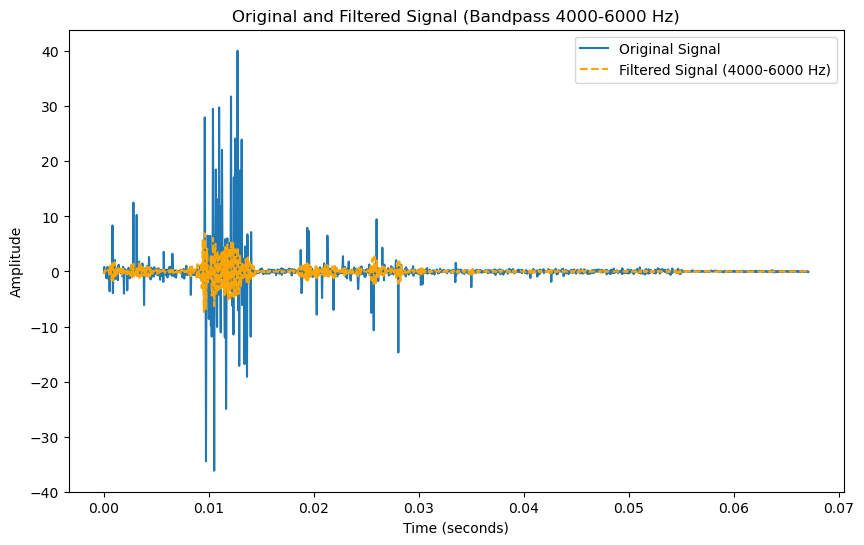

In [9]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 나이퀴스트 주파수는 샘플링 주파수의 절반
    low = lowcut / nyquist  # 하한 주파수 정규화
    high = highcut / nyquist  # 상한 주파수 정규화
    b, a = butter(order, [low, high], btype='band')  # Butterworth 필터 계수 계산
    return b, a

# 필터 적용 함수
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # 필터를 양방향으로 적용하여 위상 왜곡을 최소화
    return y

# 진동 신호 데이터 (df의 첫 번째 열 사용)
signal = df.iloc[:, 0].values  # 첫 번째 컬럼의 데이터를 사용

# 샘플링 주파수
sampling_frequency = 25600  # 25600 Hz

# 대역 통과 필터 범위 설정 (4000 Hz ~ 6000 Hz)
lowcut = 4000.0  # 하한 주파수 (4000 Hz)
highcut = 6000.0  # 상한 주파수 (6000 Hz)

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_frequency, order=4)

# 시간 벡터 생성
time = np.arange(len(signal)) / sampling_frequency  # 시간 (초 단위)

# 필터링된 신호 시각화
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Original Signal')
plt.plot(time, filtered_signal, label='Filtered Signal (4000-6000 Hz)', linestyle='--', color='orange')
plt.title('Original and Filtered Signal (Bandpass 4000-6000 Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


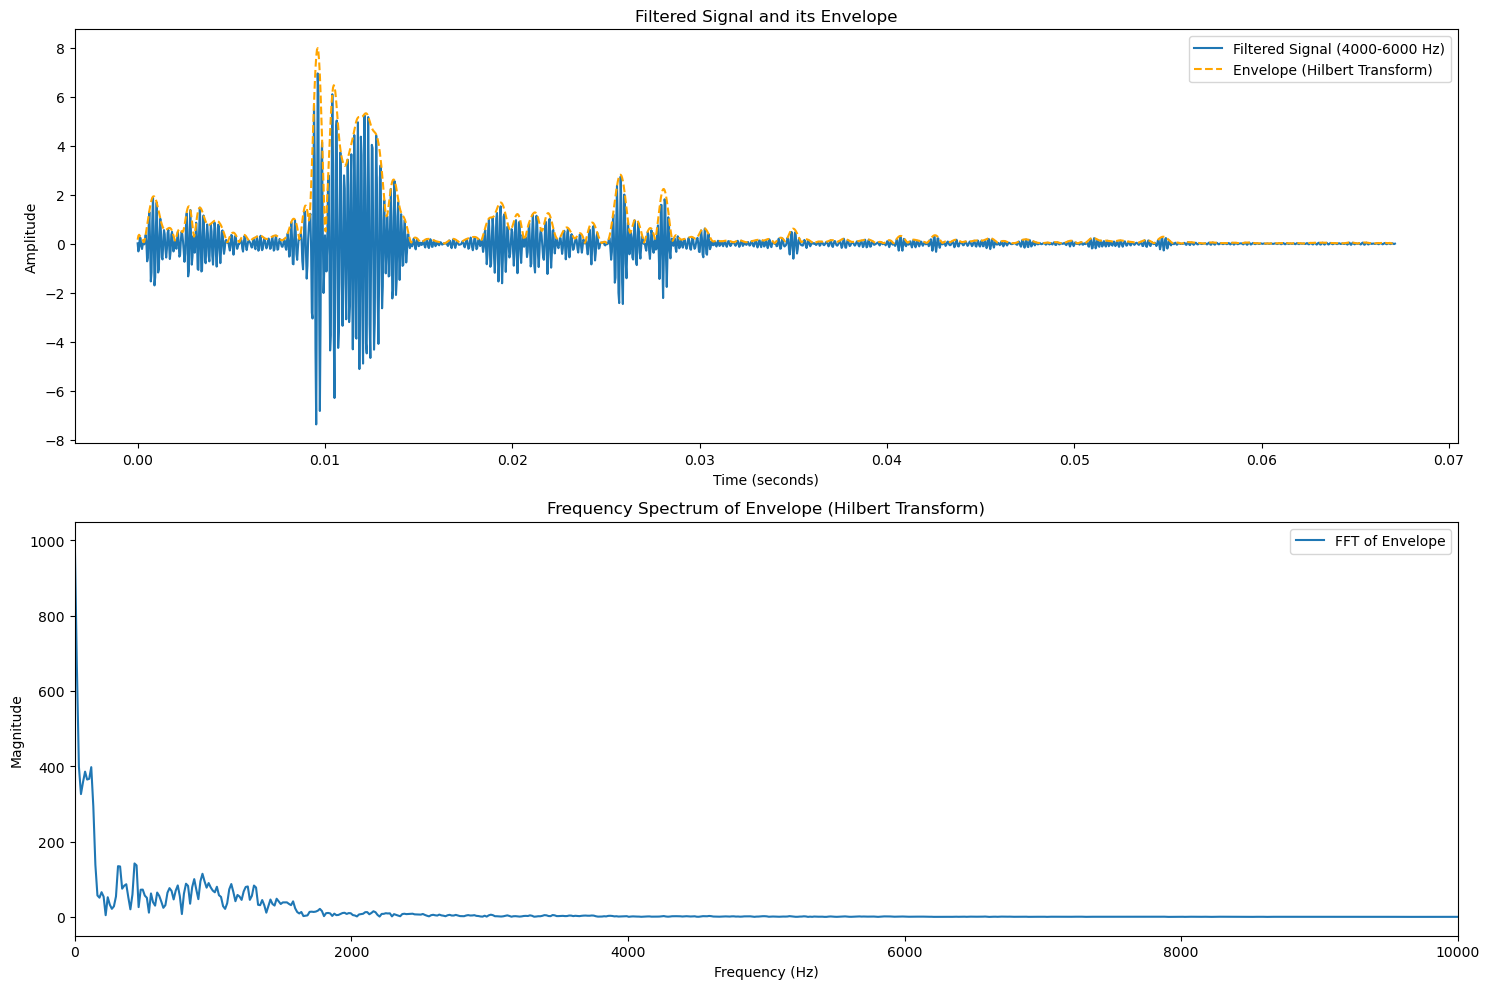

In [8]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 나이퀴스트 주파수는 샘플링 주파수의 절반
    low = lowcut / nyquist  # 하한 주파수 정규화
    high = highcut / nyquist  # 상한 주파수 정규화
    b, a = butter(order, [low, high], btype='band')  # Butterworth 필터 계수 계산
    return b, a

# 필터 적용 함수
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # 필터를 양방향으로 적용하여 위상 왜곡을 최소화
    return y



# 샘플링 주파수
sampling_frequency = 25600  # 25600 Hz

# 대역 통과 필터 범위 설정 (4000 Hz ~ 6000 Hz)
lowcut = 4000.0  # 하한 주파수 (4000 Hz)
highcut = 6000.0  # 상한 주파수 (6000 Hz)


# 진동 신호 데이터 (df의 첫 번째 열 사용)
signal = df.iloc[:, 0].values  # 첫 번째 컬럼의 데이터를 사용

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_frequency, order=4)


analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 포락선

N = len(envelope)
fft_result = fft(envelope)
fft_magnitude = np.abs(fft_result)[:N//2]  # 푸리에 변환의 절반만 사용
frequencies = np.fft.fftfreq(N, 1/sampling_frequency)[:N//2]  # 주파수 계산


# 시간 벡터 생성
time = np.arange(len(signal)) / sampling_frequency  # 시간 (초 단위)

plt.figure(figsize=(15, 10))

# 1. 필터링된 신호와 포락선 시각화
plt.subplot(2, 1, 1)
plt.plot(time, filtered_signal, label='Filtered Signal (4000-6000 Hz)')
plt.plot(time, envelope, label='Envelope (Hilbert Transform)', linestyle='--', color='orange')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# 2. 푸리에 변환 결과 시각화
plt.subplot(2, 1, 2)
plt.plot(frequencies, fft_magnitude, label='FFT of Envelope')
plt.title('Frequency Spectrum of Envelope (Hilbert Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10000)  # 관심 있는 주파수 대역 (최대 10kHz까지 표시)
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 나이퀴스트 주파수는 샘플링 주파수의 절반
    low = lowcut / nyquist  # 하한 주파수 정규화
    high = highcut / nyquist  # 상한 주파수 정규화
    b, a = butter(order, [low, high], btype='band')  # Butterworth 필터 계수 계산
    return b, a

# 필터 적용 함수
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # 필터를 양방향으로 적용하여 위상 왜곡을 최소화
    return y

# 주어진 BPFO 값 (140.29 Hz)
bpfo = 140.294118

# 샘플링 주파수 (25600 Hz)
sampling_frequency = 25600

# 대역 통과 필터 적용 (BPFO를 중심으로 ±10% 범위)
lowcut_bpfo = bpfo * 0.9  # 하한 주파수
highcut_bpfo = bpfo * 1.1  # 상한 주파수

# 400번째 진동 신호 데이터 추출
signal_400 = df.iloc[399, 0]  # 첫 번째 열의 400번째 행 데이터를 사용

# BPFO 대역 통과 필터 적용
filtered_signal_bpfo = bandpass_filter(signal_400, lowcut_bpfo, highcut_bpfo, sampling_frequency, order=4)

# 힐버트 변환을 사용하여 필터링된 신호의 포락선 추출
analytic_signal_bpfo = hilbert(filtered_signal_bpfo)
envelope_bpfo = np.abs(analytic_signal_bpfo)  # 포락선

# 푸리에 변환을 적용하여 주파수 성분 분석
N_bpfo = len(envelope_bpfo)
fft_result_bpfo = fft(envelope_bpfo)
fft_magnitude_bpfo = np.abs(fft_result_bpfo)[:N_bpfo // 2]  # 푸리에 변환의 크기 절반만 사용 (대칭 성분 제거)
frequencies_bpfo = np.fft.fftfreq(N_bpfo, 1 / sampling_frequency)[:N_bpfo // 2]  # 주파수 계산

# 시간 벡터 생성
time_bpfo = np.arange(len(signal_400)) / sampling_frequency  # 시간 (초 단위)

# BPFO에 대한 필터링된 신호, 포락선, 푸리에 변환 결과 시각화
plt.figure(figsize=(15, 10))

# 1. BPFO 필터링된 신호와 포락선 시각화
plt.subplot(2, 1, 1)
plt.plot(time_bpfo, filtered_signal_bpfo, label=f'Filtered Signal (BPFO: {bpfo:.2f} Hz ± 10%)')
plt.plot(time_bpfo, envelope_bpfo, label='Envelope (Hilbert Transform)', linestyle='--', color='orange')
plt.title('Filtered Signal and its Envelope (BPFO)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# 2. 푸리에 변환 결과 시각화
plt.subplot(2, 1, 2)
plt.plot(frequencies_bpfo, fft_magnitude_bpfo, label='FFT of Envelope')
plt.axvline(x=bpfo, color='red', linestyle='--', label=f'BPFO: {bpfo:.2f} Hz')  # BPFO 주파수에 수직선 표시
plt.title('Frequency Spectrum of Envelope (Hilbert Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2 * bpfo)  # BPFO 주변의 주파수 대역 강조
plt.legend()

plt.tight_layout()
plt.show()


IndexError: tuple index out of range

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25597,25598,25599,fault_type,pitch_diameter,ball_diameter,contact_angle,ball_count,Hz,speed
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,0.001842,-0.218857,0.000951,1,34.0,7.5,0,12,25600,1800
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,1.252963,0.190932,-0.384616,1,34.0,7.5,0,12,25600,1800
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,0.884492,0.792582,0.220288,1,34.0,7.5,0,12,25600,1800
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,-0.387816,-0.188670,0.041774,1,34.0,7.5,0,12,25600,1800
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,-0.322704,0.446788,0.769093,1,34.0,7.5,0,12,25600,1800


In [12]:
import numpy as np

# 회전 주파수 (Hz)로 변환
df['f'] = df['speed'] / 60  # 회전 주파수 f

# 접촉각 (phi) 값이 0도이므로 코사인 0을 사용
phi = np.radians(df['contact_angle'])  # 라디안 변환

# FTF 계산
df['FTF'] = (df['f'] / 2) * (1 - (df['ball_diameter'] / df['pitch_diameter']) * np.cos(phi))

# BSF 계산
df['BSF'] = (df['f'] * df['pitch_diameter'] / (2 * df['ball_diameter'])) * \
            (1 - ((df['ball_diameter'] / df['pitch_diameter']) * np.cos(phi)) ** 2)

# BPFO 계산
df['BPFO'] = (df['ball_count'] / 2) * df['f'] * (1 - (df['ball_diameter'] / df['pitch_diameter']) * np.cos(phi))

# BPFI 계산
df['BPFI'] = (df['ball_count'] / 2) * df['f'] * (1 + (df['ball_diameter'] / df['pitch_diameter']) * np.cos(phi))




In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,ball_diameter,contact_angle,ball_count,Hz,speed,f,FTF,BSF,BPFO,BPFI
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882


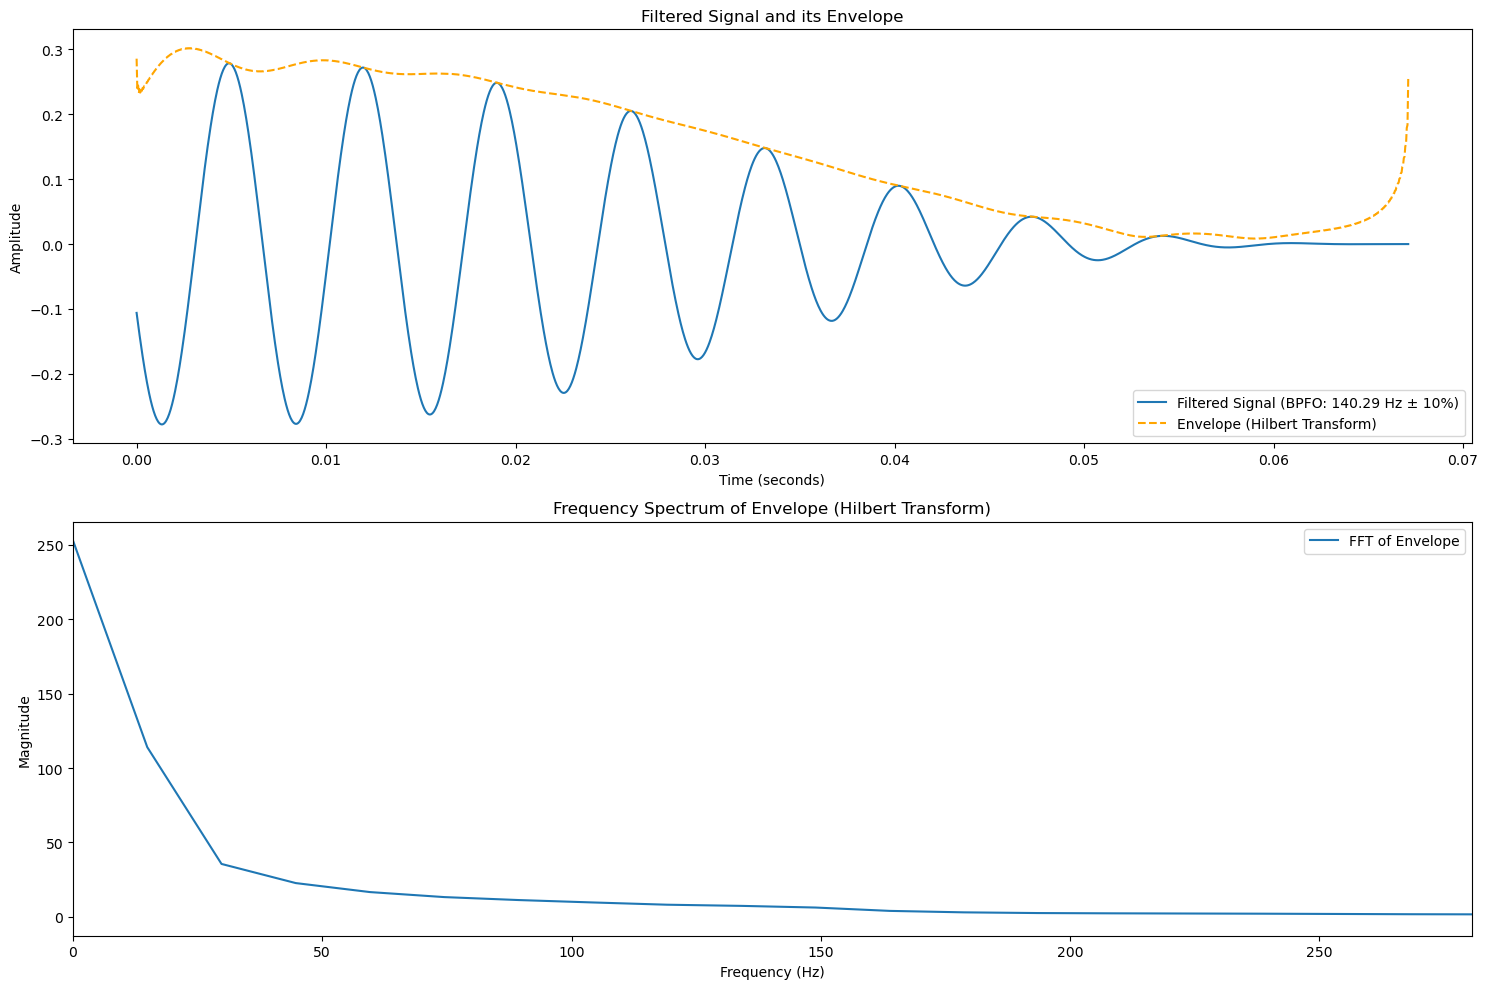

In [14]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 회전 주파수 (Hz)로 변환
df['f'] = df['speed'] / 60  # 회전 주파수 f (단위: Hz)

# 접촉각 (phi) 값이 0도이므로 코사인 0을 사용
phi = np.radians(df['contact_angle'])  # 라디안 변환

# BPFO 계산 (외륜 결함 주파수)
df['BPFO'] = (df['ball_count'] / 2) * df['f'] * (1 - (df['ball_diameter'] / df['pitch_diameter']) * np.cos(phi))

# BPFO 계산 결과 중에서 첫 번째 행 값 사용 (예시로 첫 번째 데이터를 사용)
bpfo = df['BPFO'].iloc[0]

# 대역 통과 필터 생성 함수
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 나이퀴스트 주파수는 샘플링 주파수의 절반
    low = lowcut / nyquist  # 하한 주파수 정규화
    high = highcut / nyquist  # 상한 주파수 정규화
    b, a = butter(order, [low, high], btype='band')  # Butterworth 필터 계수 계산
    return b, a

# 필터 적용 함수
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # 필터를 양방향으로 적용하여 위상 왜곡을 최소화
    return y

# 샘플링 주파수 (25600 Hz)
sampling_frequency = 25600

# BPFO 주파수 대역 설정 (예: BPFO ± 10% 범위)
lowcut = bpfo * 0.9  # 하한 주파수
highcut = bpfo * 1.1  # 상한 주파수

# 진동 신호 데이터 (df의 첫 번째 열 사용)
signal = df.iloc[:, 0].values  # 첫 번째 컬럼의 데이터를 사용

# BPFO 대역 통과 필터 적용
filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_frequency, order=4)

# 힐버트 변환을 사용하여 필터링된 신호의 포락선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 포락선

# 푸리에 변환을 적용하여 주파수 성분 분석
N = len(envelope)
fft_result = fft(envelope)
fft_magnitude = np.abs(fft_result)[:N // 2]  # 푸리에 변환의 크기 절반만 사용 (대칭 성분 제거)
frequencies = np.fft.fftfreq(N, 1 / sampling_frequency)[:N // 2]  # 주파수 계산

# 시간 벡터 생성
time = np.arange(len(signal)) / sampling_frequency  # 시간 (초 단위)

# 필터링된 신호, 포락선, 푸리에 변환 결과 시각화
plt.figure(figsize=(15, 10))

# 1. 필터링된 신호와 포락선 시각화
plt.subplot(2, 1, 1)
plt.plot(time, filtered_signal, label=f'Filtered Signal (BPFO: {bpfo:.2f} Hz ± 10%)')
plt.plot(time, envelope, label='Envelope (Hilbert Transform)', linestyle='--', color='orange')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# 2. 푸리에 변환 결과 시각화
plt.subplot(2, 1, 2)
plt.plot(frequencies, fft_magnitude, label='FFT of Envelope')
plt.title('Frequency Spectrum of Envelope (Hilbert Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2 * bpfo)  # BPFO 주변의 주파수 대역 강조
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
df['fault_type'].value_counts()

fault_type
2    431
1    430
3    429
0    429
Name: count, dtype: int64

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,ball_diameter,contact_angle,ball_count,Hz,speed,f,FTF,BSF,BPFO,BPFI
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,7.5,0,12,25600,1800,30.0,11.691176,64.691176,140.294118,219.705882


BPFI (Ball Pass Frequency Inner race): 219.71 Hz


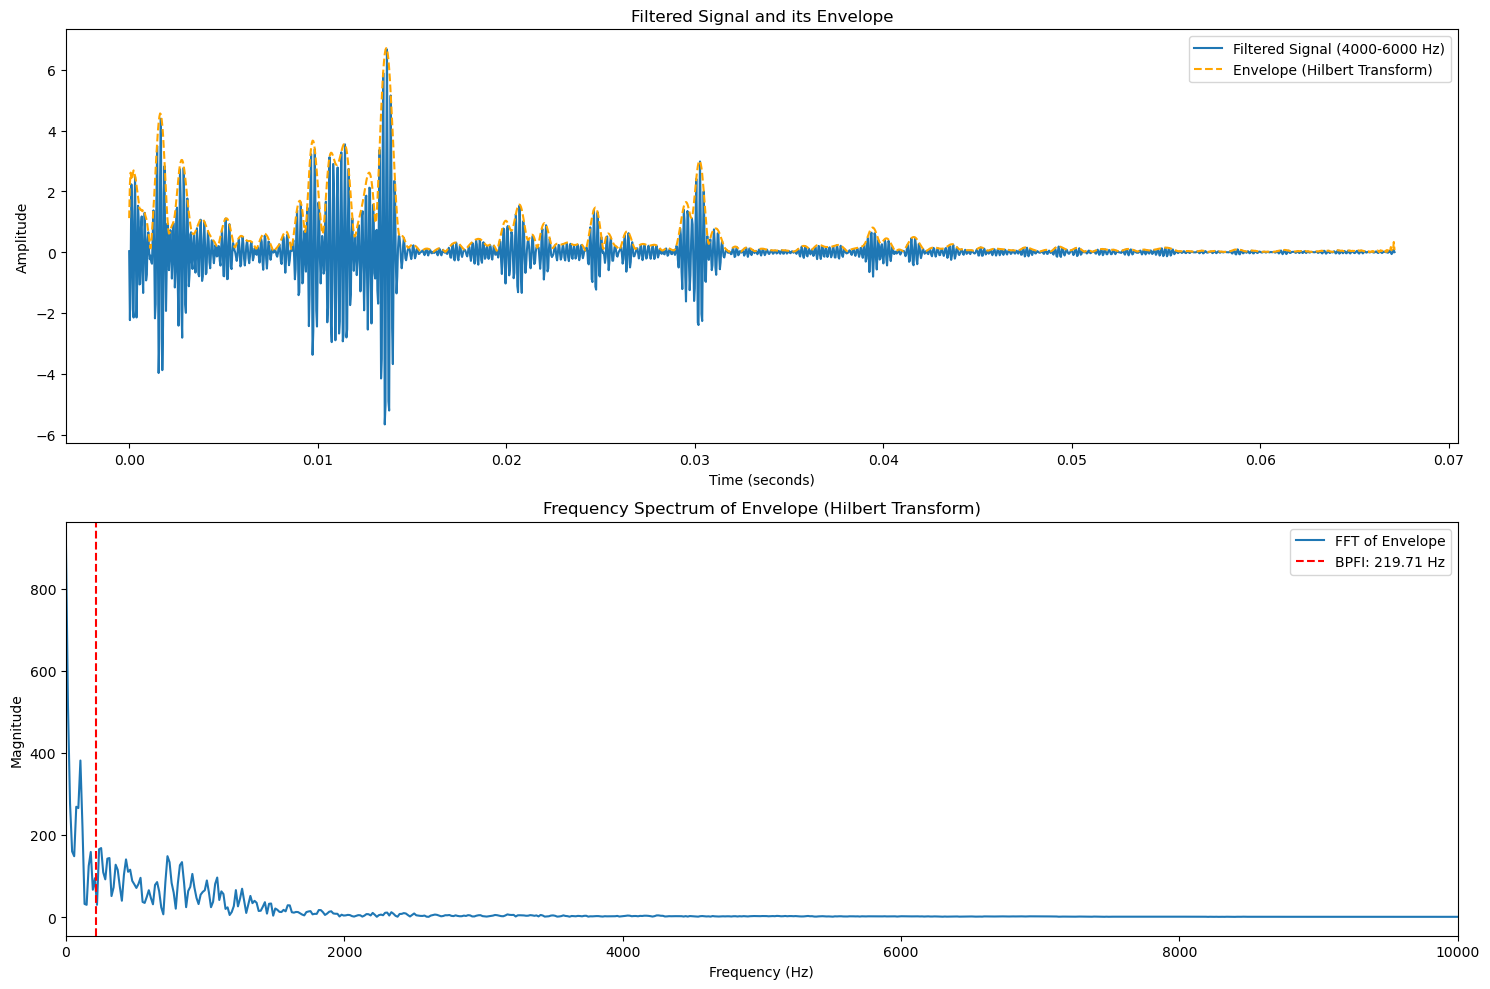

In [32]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 나이퀴스트 주파수는 샘플링 주파수의 절반
    low = lowcut / nyquist  # 하한 주파수 정규화
    high = highcut / nyquist  # 상한 주파수 정규화
    b, a = butter(order, [low, high], btype='band')  # Butterworth 필터 계수 계산
    return b, a

# 필터 적용 함수
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # 필터를 양방향으로 적용하여 위상 왜곡을 최소화
    return y

# 샘플링 주파수 (25600 Hz)
sampling_frequency = 25600

# 대역 통과 필터 범위 설정 (4000 Hz ~ 6000 Hz)
lowcut = 4000.0  # 하한 주파수 (4000 Hz)
highcut = 6000.0  # 상한 주파수 (6000 Hz)

# 진동 신호 데이터 (df의 첫 번째 열 사용)
signal = df.iloc[:, 200].values  # 첫 번째 컬럼의 데이터를 사용

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_frequency, order=4)

# 힐버트 변환을 사용하여 필터링된 신호의 포락선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 포락선

# 푸리에 변환을 적용하여 주파수 성분 분석
N = len(envelope)
fft_result = fft(envelope)
fft_magnitude = np.abs(fft_result)[:N//2]  # 푸리에 변환의 크기 절반만 사용 (대칭 성분 제거)
frequencies = np.fft.fftfreq(N, 1/sampling_frequency)[:N//2]  # 주파수 계산

# BPFI 계산 (내륜 결함 주파수)
n_balls = df['ball_count'].iloc[0]  # 볼 개수
ball_diameter = df['ball_diameter'].iloc[0]  # 볼 직경
pitch_diameter = df['pitch_diameter'].iloc[0]  # 피치 직경
contact_angle = np.radians(df['contact_angle'].iloc[0])  # 접촉각 (라디안)
rotation_speed = df['speed'].iloc[0]  # 회전 속도 (RPM)

# 회전 주파수 (Hz)
rotation_frequency = rotation_speed / 60  # f_r = 회전 속도 / 60

# BPFI 계산
bpfi = (n_balls / 2) * rotation_frequency * (1 + (ball_diameter / pitch_diameter) * np.cos(contact_angle))

print(f"BPFI (Ball Pass Frequency Inner race): {bpfi:.2f} Hz")

# 시간 벡터 생성
time = np.arange(len(signal)) / sampling_frequency  # 시간 (초 단위)

# 필터링된 신호, 포락선, 푸리에 변환 결과 시각화
plt.figure(figsize=(15, 10))

# 1. 필터링된 신호와 포락선 시각화
plt.subplot(2, 1, 1)
plt.plot(time, filtered_signal, label='Filtered Signal (4000-6000 Hz)')
plt.plot(time, envelope, label='Envelope (Hilbert Transform)', linestyle='--', color='orange')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# 2. 푸리에 변환 결과 시각화
plt.subplot(2, 1, 2)
plt.plot(frequencies, fft_magnitude, label='FFT of Envelope')
plt.axvline(x=bpfi, color='red', linestyle='--', label=f'BPFI: {bpfi:.2f} Hz')  # BPFI 주파수에 수직선 표시
plt.title('Frequency Spectrum of Envelope (Hilbert Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10000)  # 관심 있는 주파수 대역 (최대 10kHz까지 표시)
plt.legend()

plt.tight_layout()
plt.show()


BSF (Ball Spin Frequency): 64.69 Hz


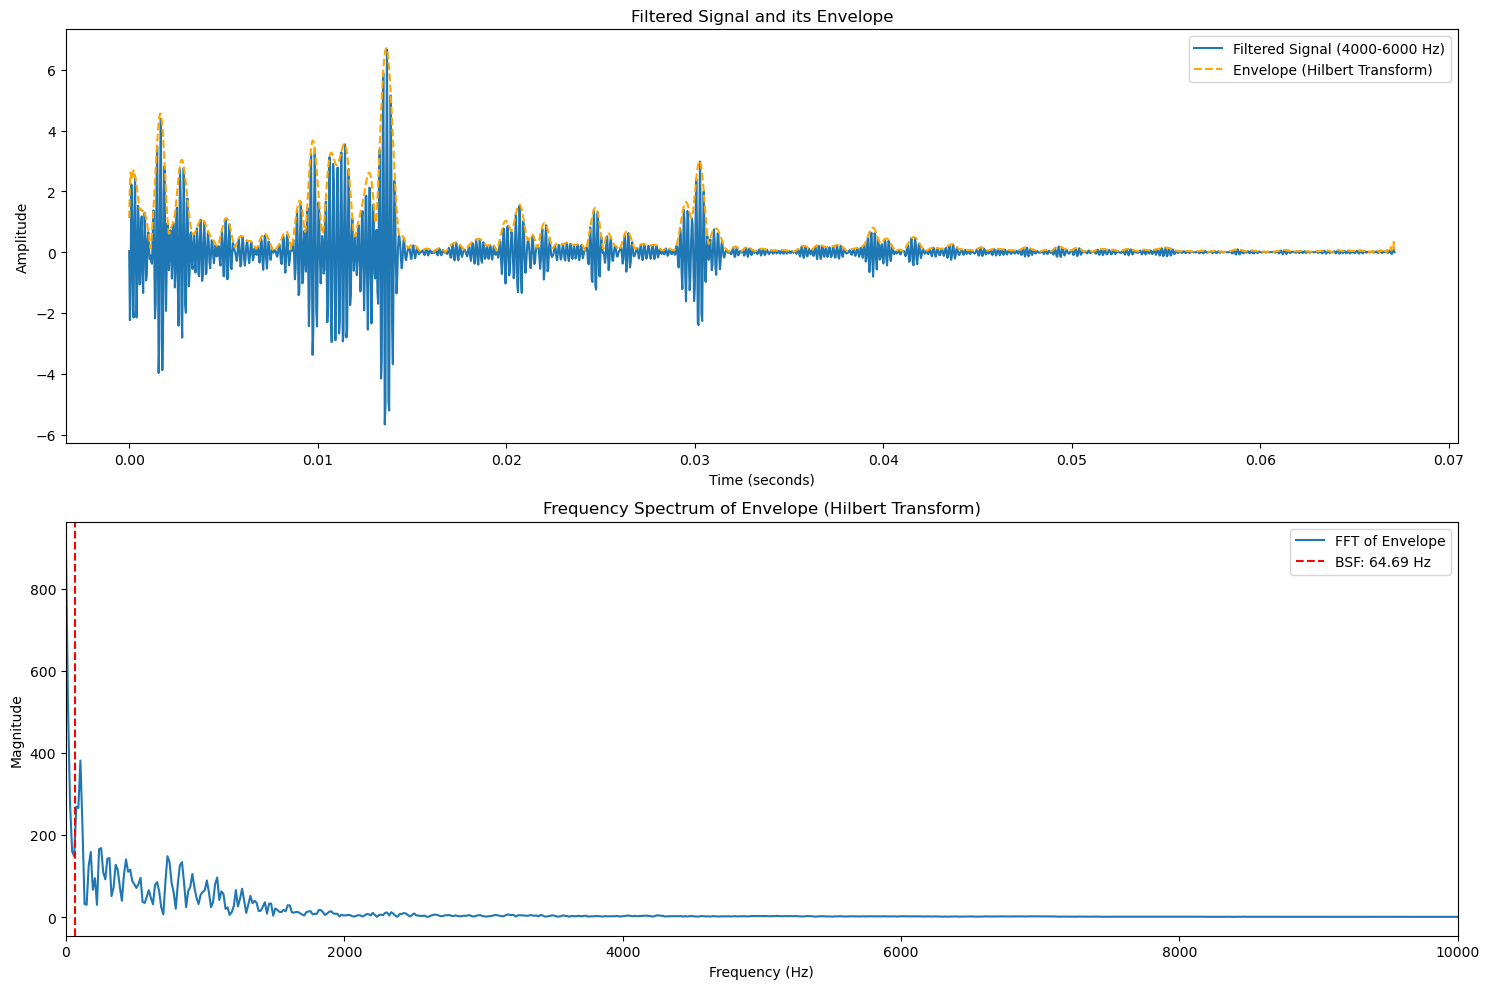

In [22]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 나이퀴스트 주파수는 샘플링 주파수의 절반
    low = lowcut / nyquist  # 하한 주파수 정규화
    high = highcut / nyquist  # 상한 주파수 정규화
    b, a = butter(order, [low, high], btype='band')  # Butterworth 필터 계수 계산
    return b, a

# 필터 적용 함수
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # 필터를 양방향으로 적용하여 위상 왜곡을 최소화
    return y

# 샘플링 주파수 (25600 Hz)
sampling_frequency = 25600

# 대역 통과 필터 범위 설정 (4000 Hz ~ 6000 Hz)
lowcut = 4000.0  # 하한 주파수 (4000 Hz)
highcut = 6000.0  # 상한 주파수 (6000 Hz)

# 진동 신호 데이터 (df의 첫 번째 열 사용)
signal = df.iloc[:, 200].values  # 첫 번째 컬럼의 데이터를 사용

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_frequency, order=4)

# 힐버트 변환을 사용하여 필터링된 신호의 포락선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 포락선

# 푸리에 변환을 적용하여 주파수 성분 분석
N = len(envelope)
fft_result = fft(envelope)
fft_magnitude = np.abs(fft_result)[:N//2]  # 푸리에 변환의 크기 절반만 사용 (대칭 성분 제거)
frequencies = np.fft.fftfreq(N, 1/sampling_frequency)[:N//2]  # 주파수 계산

# BSF 계산 (볼 결함 주파수)
n_balls = df['ball_count'].iloc[0]  # 볼 개수
ball_diameter = df['ball_diameter'].iloc[0]  # 볼 직경
pitch_diameter = df['pitch_diameter'].iloc[0]  # 피치 직경
contact_angle = np.radians(df['contact_angle'].iloc[0])  # 접촉각 (라디안)
rotation_speed = df['speed'].iloc[0]  # 회전 속도 (RPM)

# 회전 주파수 (Hz)
rotation_frequency = rotation_speed / 60  # f_r = 회전 속도 / 60

# BSF 계산
bsf = (rotation_frequency * pitch_diameter / (2 * ball_diameter)) * (1 - ((ball_diameter / pitch_diameter) * np.cos(contact_angle)) ** 2)

print(f"BSF (Ball Spin Frequency): {bsf:.2f} Hz")

# 시간 벡터 생성
time = np.arange(len(signal)) / sampling_frequency  # 시간 (초 단위)

# 필터링된 신호, 포락선, 푸리에 변환 결과 시각화
plt.figure(figsize=(15, 10))

# 1. 필터링된 신호와 포락선 시각화
plt.subplot(2, 1, 1)
plt.plot(time, filtered_signal, label='Filtered Signal (4000-6000 Hz)')
plt.plot(time, envelope, label='Envelope (Hilbert Transform)', linestyle='--', color='orange')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# 2. 푸리에 변환 결과 시각화
plt.subplot(2, 1, 2)
plt.plot(frequencies, fft_magnitude, label='FFT of Envelope')
plt.axvline(x=bsf, color='red', linestyle='--', label=f'BSF: {bsf:.2f} Hz')  # BSF 주파수에 수직선 표시
plt.title('Frequency Spectrum of Envelope (Hilbert Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10000)  # 관심 있는 주파수 대역 (최대 10kHz까지 표시)
plt.legend()

plt.tight_layout()
plt.show()


BSFO (Ball Spin Frequency Outer race): 140.29 Hz


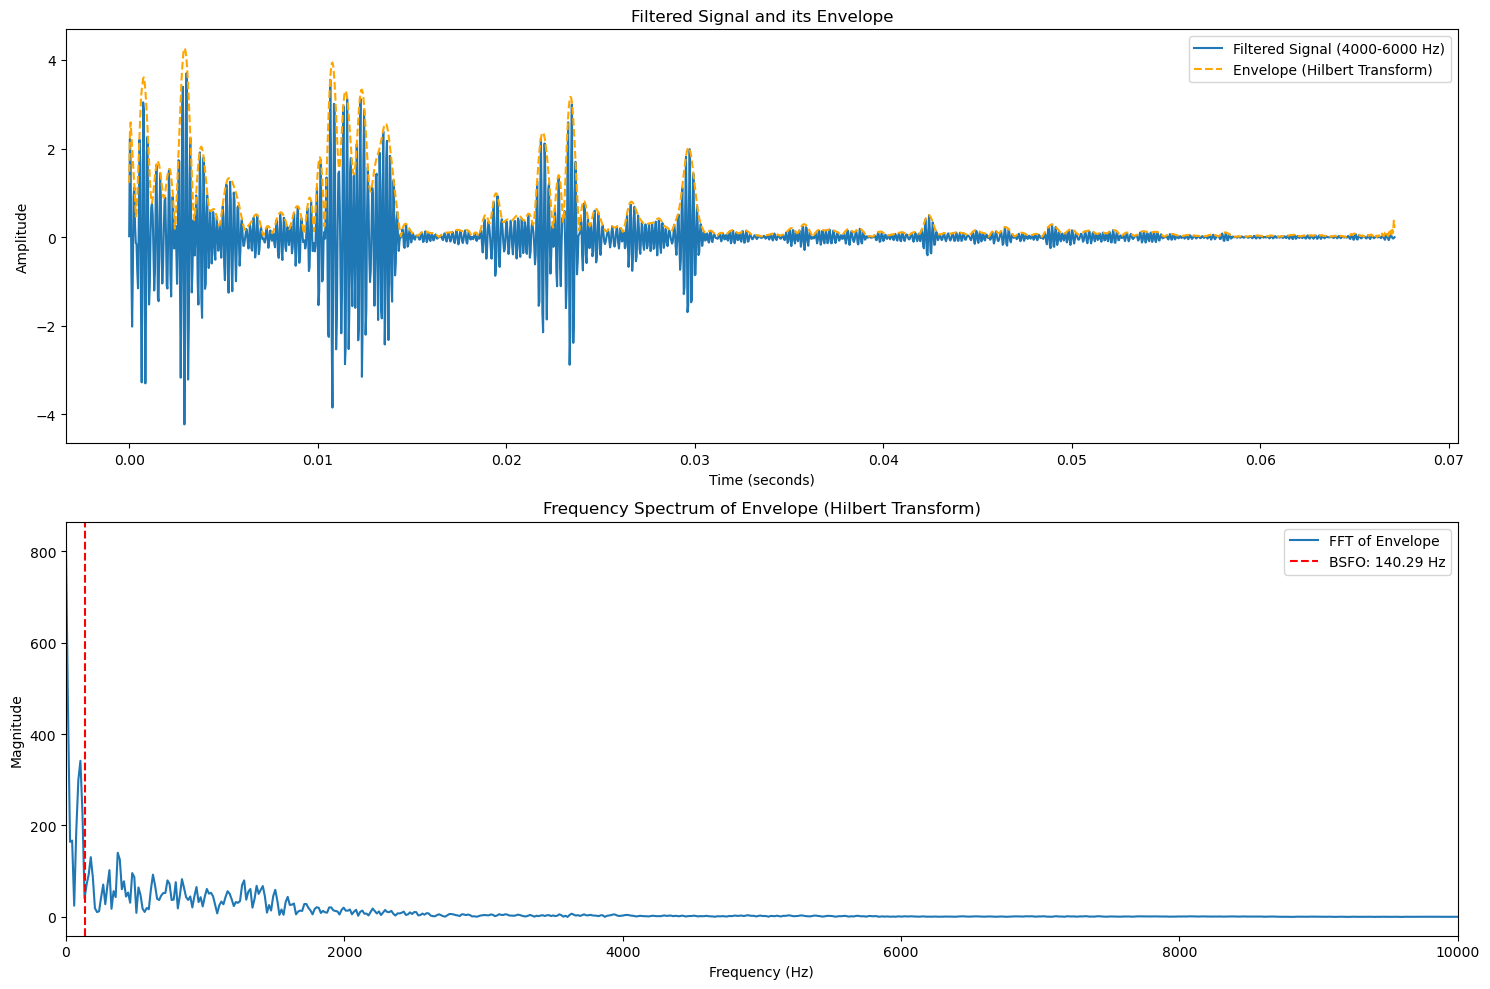

In [29]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 나이퀴스트 주파수는 샘플링 주파수의 절반
    low = lowcut / nyquist  # 하한 주파수 정규화
    high = highcut / nyquist  # 상한 주파수 정규화
    b, a = butter(order, [low, high], btype='band')  # Butterworth 필터 계수 계산
    return b, a

# 필터 적용 함수
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # 필터를 양방향으로 적용하여 위상 왜곡을 최소화
    return y

# 샘플링 주파수 (25600 Hz)
sampling_frequency = 25600

# 대역 통과 필터 범위 설정 (4000 Hz ~ 6000 Hz)
lowcut = 4000.0  # 하한 주파수 (4000 Hz)
highcut = 6000.0  # 상한 주파수 (6000 Hz)

# 진동 신호 데이터 (df의 첫 번째 열 사용)
signal = df.iloc[:, 330].values  # 첫 번째 컬럼의 데이터를 사용

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_frequency, order=4)

# 힐버트 변환을 사용하여 필터링된 신호의 포락선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 포락선

# 푸리에 변환을 적용하여 주파수 성분 분석
N = len(envelope)
fft_result = fft(envelope)
fft_magnitude = np.abs(fft_result)[:N//2]  # 푸리에 변환의 크기 절반만 사용 (대칭 성분 제거)
frequencies = np.fft.fftfreq(N, 1/sampling_frequency)[:N//2]  # 주파수 계산

# BSFO 계산 (외륜 결함 주파수)
n_balls = df['ball_count'].iloc[0]  # 볼 개수
ball_diameter = df['ball_diameter'].iloc[0]  # 볼 직경
pitch_diameter = df['pitch_diameter'].iloc[0]  # 피치 직경
contact_angle = np.radians(df['contact_angle'].iloc[0])  # 접촉각 (라디안)
rotation_speed = df['speed'].iloc[0]  # 회전 속도 (RPM)

# 회전 주파수 (Hz)
rotation_frequency = rotation_speed / 60  # f_r = 회전 속도 / 60

# BSFO 계산
bsfo = (n_balls / 2) * rotation_frequency * (1 - (ball_diameter / pitch_diameter) * np.cos(contact_angle))

print(f"BSFO (Ball Spin Frequency Outer race): {bsfo:.2f} Hz")

# 시간 벡터 생성
time = np.arange(len(signal)) / sampling_frequency  # 시간 (초 단위)

# 필터링된 신호, 포락선, 푸리에 변환 결과 시각화
plt.figure(figsize=(15, 10))

# 1. 필터링된 신호와 포락선 시각화
plt.subplot(2, 1, 1)
plt.plot(time, filtered_signal, label='Filtered Signal (4000-6000 Hz)')
plt.plot(time, envelope, label='Envelope (Hilbert Transform)', linestyle='--', color='orange')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# 2. 푸리에 변환 결과 시각화
plt.subplot(2, 1, 2)
plt.plot(frequencies, fft_magnitude, label='FFT of Envelope')
plt.axvline(x=bsfo, color='red', linestyle='--', label=f'BSFO: {bsfo:.2f} Hz')  # BSFO 주파수에 수직선 표시
plt.title('Frequency Spectrum of Envelope (Hilbert Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10000)  # 관심 있는 주파수 대역 (최대 10kHz까지 표시)
plt.legend()

plt.tight_layout()
plt.show()


BSFO (Ball Spin Frequency Outer race): 140.29 Hz


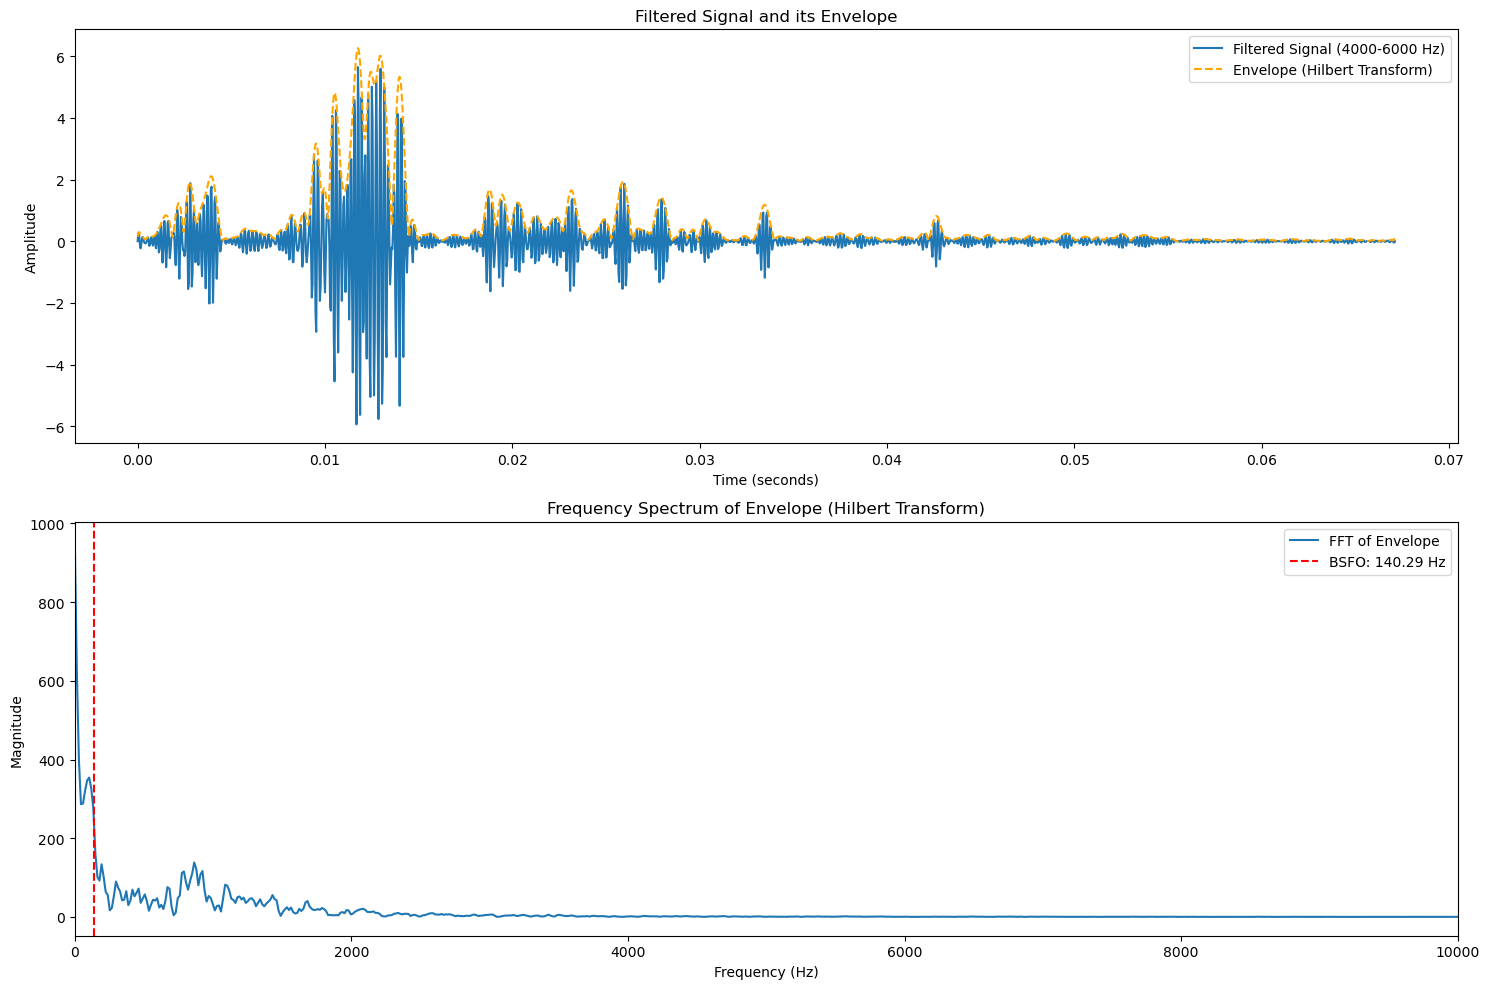

In [33]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 나이퀴스트 주파수는 샘플링 주파수의 절반
    low = lowcut / nyquist  # 하한 주파수 정규화
    high = highcut / nyquist  # 상한 주파수 정규화
    b, a = butter(order, [low, high], btype='band')  # Butterworth 필터 계수 계산
    return b, a

# 필터 적용 함수
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # 필터를 양방향으로 적용하여 위상 왜곡을 최소화
    return y

# 샘플링 주파수 (25600 Hz)
sampling_frequency = 25600

# 대역 통과 필터 범위 설정 (4000 Hz ~ 6000 Hz)
lowcut = 4000.0  # 하한 주파수 (4000 Hz)
highcut = 6000.0  # 상한 주파수 (6000 Hz)

# 진동 신호 데이터 (df의 첫 번째 열 사용)
signal = df.iloc[:, 1].values  # 첫 번째 컬럼의 데이터를 사용

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_frequency, order=4)

# 힐버트 변환을 사용하여 필터링된 신호의 포락선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 포락선

# 푸리에 변환을 적용하여 주파수 성분 분석
N = len(envelope)
fft_result = fft(envelope)
fft_magnitude = np.abs(fft_result)[:N//2]  # 푸리에 변환의 크기 절반만 사용 (대칭 성분 제거)
frequencies = np.fft.fftfreq(N, 1/sampling_frequency)[:N//2]  # 주파수 계산

# BSFO 계산 (외륜 결함 주파수)
n_balls = df['ball_count'].iloc[0]  # 볼 개수
ball_diameter = df['ball_diameter'].iloc[0]  # 볼 직경
pitch_diameter = df['pitch_diameter'].iloc[0]  # 피치 직경
contact_angle = np.radians(df['contact_angle'].iloc[0])  # 접촉각 (라디안)
rotation_speed = df['speed'].iloc[0]  # 회전 속도 (RPM)

# 회전 주파수 (Hz)
rotation_frequency = rotation_speed / 60  # f_r = 회전 속도 / 60

# BSFO 계산
bsfo = (n_balls / 2) * rotation_frequency * (1 - (ball_diameter / pitch_diameter) * np.cos(contact_angle))

print(f"BSFO (Ball Spin Frequency Outer race): {bsfo:.2f} Hz")

# 시간 벡터 생성
time = np.arange(len(signal)) / sampling_frequency  # 시간 (초 단위)

# 필터링된 신호, 포락선, 푸리에 변환 결과 시각화
plt.figure(figsize=(15, 10))

# 1. 필터링된 신호와 포락선 시각화
plt.subplot(2, 1, 1)
plt.plot(time, filtered_signal, label='Filtered Signal (4000-6000 Hz)')
plt.plot(time, envelope, label='Envelope (Hilbert Transform)', linestyle='--', color='orange')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# 2. 푸리에 변환 결과 시각화
plt.subplot(2, 1, 2)
plt.plot(frequencies, fft_magnitude, label='FFT of Envelope')
plt.axvline(x=bsfo, color='red', linestyle='--', label=f'BSFO: {bsfo:.2f} Hz')  # BSFO 주파수에 수직선 표시
plt.title('Frequency Spectrum of Envelope (Hilbert Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10000)  # 관심 있는 주파수 대역 (최대 10kHz까지 표시)
plt.legend()

plt.tight_layout()
plt.show()


BSFO (Ball Spin Frequency Outer race): 140.29 Hz


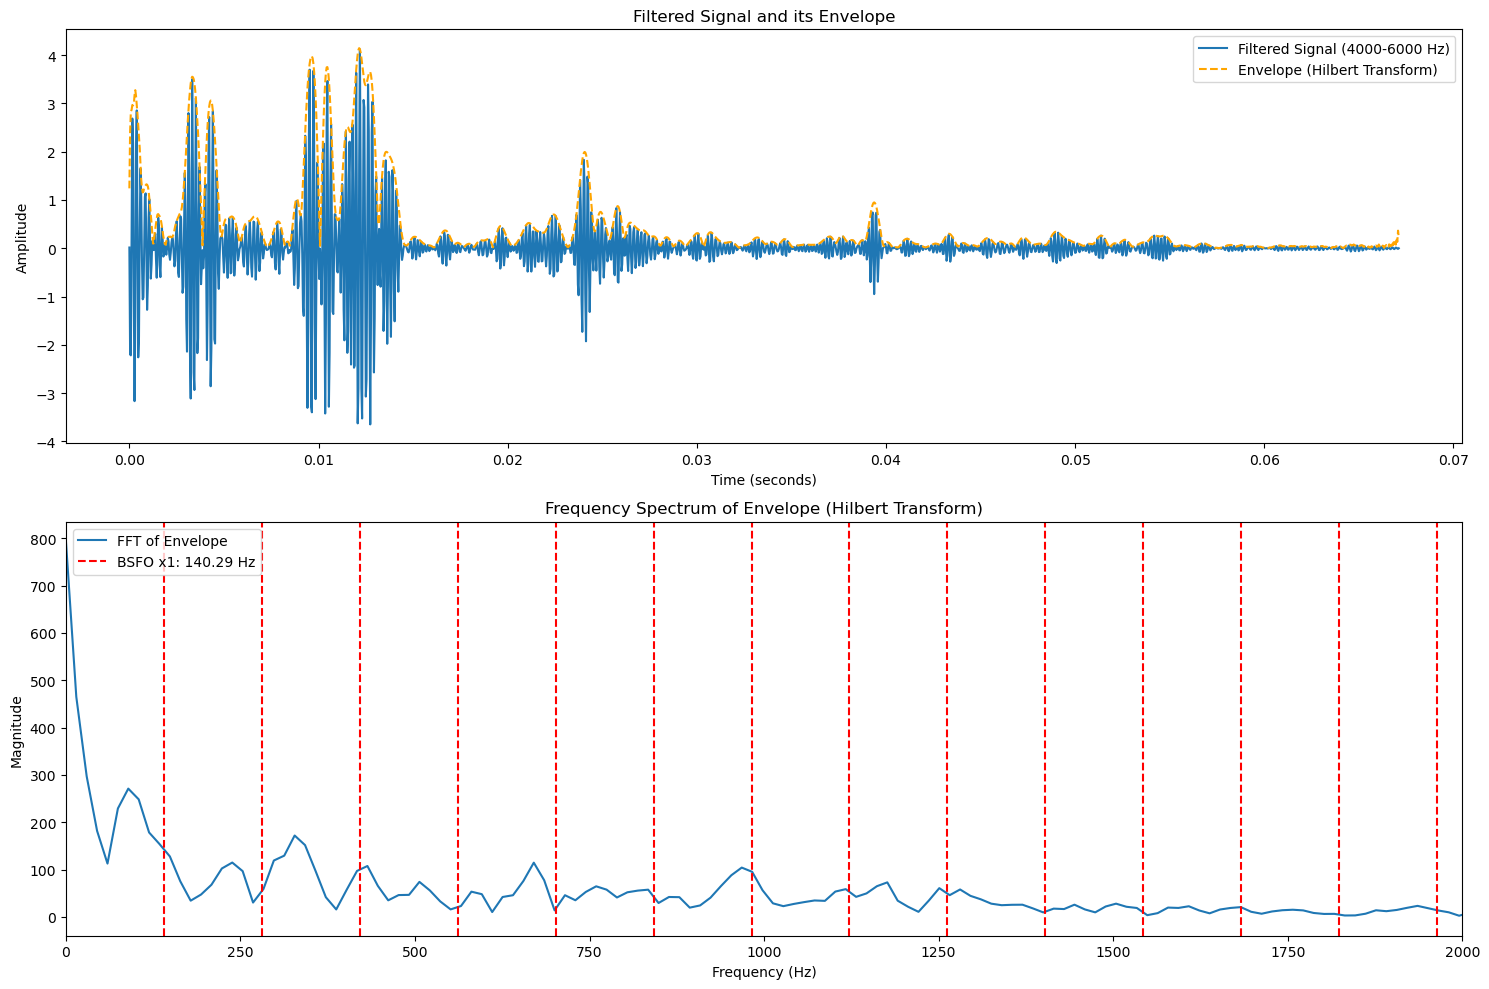

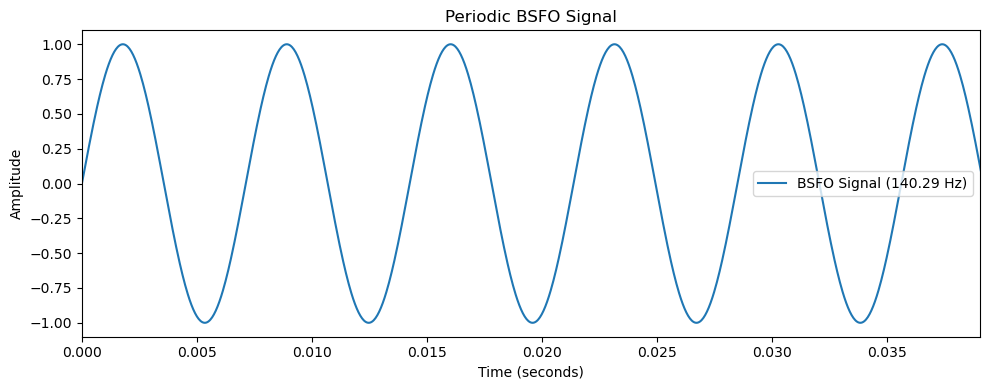

In [37]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 나이퀴스트 주파수는 샘플링 주파수의 절반
    low = lowcut / nyquist  # 하한 주파수 정규화
    high = highcut / nyquist  # 상한 주파수 정규화
    b, a = butter(order, [low, high], btype='band')  # Butterworth 필터 계수 계산
    return b, a

# 필터 적용 함수
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # 필터를 양방향으로 적용하여 위상 왜곡을 최소화
    return y

# 샘플링 주파수 (25600 Hz)
sampling_frequency = 25600

# 대역 통과 필터 범위 설정 (4000 Hz ~ 6000 Hz)
lowcut = 4000.0  # 하한 주파수 (4000 Hz)
highcut = 6000.0  # 상한 주파수 (6000 Hz)

# 진동 신호 데이터 (df의 첫 번째 열 사용)
signal = df.iloc[:, 300].values  # 첫 번째 컬럼의 데이터를 사용

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_frequency, order=4)

# 힐버트 변환을 사용하여 필터링된 신호의 포락선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 포락선

# 푸리에 변환을 적용하여 주파수 성분 분석
N = len(envelope)
fft_result = fft(envelope)
fft_magnitude = np.abs(fft_result)[:N//2]  # 푸리에 변환의 크기 절반만 사용 (대칭 성분 제거)
frequencies = np.fft.fftfreq(N, 1/sampling_frequency)[:N//2]  # 주파수 계산

# BSFO 계산 (외륜 결함 주파수)
n_balls = df['ball_count'].iloc[0]  # 볼 개수
ball_diameter = df['ball_diameter'].iloc[0]  # 볼 직경
pitch_diameter = df['pitch_diameter'].iloc[0]  # 피치 직경
contact_angle = np.radians(df['contact_angle'].iloc[0])  # 접촉각 (라디안)
rotation_speed = df['speed'].iloc[0]  # 회전 속도 (RPM)

# 회전 주파수 (Hz)
rotation_frequency = rotation_speed / 60  # f_r = 회전 속도 / 60

# BSFO 계산
bsfo = (n_balls / 2) * rotation_frequency * (1 - (ball_diameter / pitch_diameter) * np.cos(contact_angle))

print(f"BSFO (Ball Spin Frequency Outer race): {bsfo:.2f} Hz")

# BSFO 주기를 주기적으로 반복하는 신호 생성
bsfo_period = 1 / bsfo  # BSFO의 주기 (초)
time_vector = np.arange(0, 10, 1/sampling_frequency)  # 10초간의 시간 벡터 생성

# 주기적으로 반복되는 BSFO 신호 생성 (사인파로 모델링)
bsfo_signal = np.sin(2 * np.pi * bsfo * time_vector)

# 시간 벡터 생성
time = np.arange(len(signal)) / sampling_frequency  # 시간 (초 단위)

# 필터링된 신호, 포락선, 푸리에 변환 결과 시각화
plt.figure(figsize=(15, 10))

# 1. 필터링된 신호와 포락선 시각화
plt.subplot(2, 1, 1)
plt.plot(time, filtered_signal, label='Filtered Signal (4000-6000 Hz)')
plt.plot(time, envelope, label='Envelope (Hilbert Transform)', linestyle='--', color='orange')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# 2. 푸리에 변환 결과 시각화
plt.subplot(2, 1, 2)
plt.plot(frequencies, fft_magnitude, label='FFT of Envelope')

# BSFO 주파수를 주기적으로 반복하여 그리기 (최대 2000 Hz까지)
for i in range(1, int(2000 // bsfo) + 1):
    plt.axvline(x=bsfo * i, color='red', linestyle='--', label=f'BSFO x{i}: {bsfo * i:.2f} Hz' if i == 1 else None)

plt.title('Frequency Spectrum of Envelope (Hilbert Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)  # 관심 있는 주파수 대역 (2000 Hz까지만 표시)
plt.legend()

plt.tight_layout()
plt.show()

# BSFO 신호 시각화 (x축을 1000까지만 표시)
plt.figure(figsize=(10, 4))
plt.plot(time_vector, bsfo_signal, label=f'BSFO Signal ({bsfo:.2f} Hz)')
plt.title('Periodic BSFO Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0, 1000 / sampling_frequency)  # x축을 1000까지만 표시
plt.legend()
plt.tight_layout()
plt.show()
